# CGP213/TP 1: Schéma explicite pour l'équation de la chaleur

<center style="padding: 25px">
Télécharger ce document au format
<a href="TP1.html"  download>HTML</a> ou
<a href="TP1.ipynb" download>Jupyter</a>.
</center>

**ÉNONCÉ DU PROBLÈME.** On approche la solution $u(x, t)$ du modèle de la chaleur à une dimension spatiale
$$
    \frac{\partial u}{\partial t} - \frac{\partial^2 u}{\partial x^2} = 0 \ , \quad \text{avec } 0 < x < 1 \text{ et } t > 0
$$
La condition initiale choisie est $u(x, 0) = \sin(\pi \cdot x)$ pour $0 \leq x \leq 1$
et on considère une condition limite de Dirichlet homogène, c'est-à-dire
$u(0, t) = u(1, t) = 0$ pour $t > 0$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

**QUESTION 1.** Calculer la solution exacte $V = u(x', t')$ pour $x' = 1/4$ et $t' = 1/15$.

Il faut déterminer la solution analytique
Il est possible de réaliser une résolution par séparation 
u(x,t) = X(x) * T(t)
$$
\frac{\partial u}{\partial t} = X(x) * T'(t)
$$
$$
\frac{\partial u^2 u}{\partial x^2} = X''(x) * T(t)
$$
Ce qui donne 
$$
\frac{T'(t)}{T (t)} = \frac{X''(x)}{X(x)} = C
$$
$$
T=\exp(Ct)
$$
$$
X = sin (\pi x)
$$
$$
u(x,t) = sin (\pi x) \exp (Ct)
$$
$$
\frac{\partial u}{\partial t} = C sin(\pi x) \exp (Ct)
$$
$$
\frac{\partial u^2 u}{\partial x^2} = -\pi^2 sin(\pi x) exp (Ct)
$$
$$
C = - \pi^2
$$

In [2]:


def V(x):
    return (np.sin(np.pi*x))*np.exp((-np.pi*np.pi)*(1/15))

y = V(1/4)
y

0.36621041111235797

**QUESTION 2.** En utilisant une première grille ($0 \leq j \leq m$ avec $m$ de l'ordre de 30) et un nombre de pas de temps adéquat ($0 \leq k \leq n$ avec $n$ à déterminer).

* Calculer une solution approchée de $V$ qu'on notera $v_1$ à l'aide d'un schéma **EXPLICITE**
* Calculer l'erreur $|v_1 - V|$

In [3]:
# Paramètres etude:

L = 1 #Longueur du domaine (longueur de la bar)
k = 1 #Coefficient de diffusion 
Tf = 1/15 #Temps final de l'étude

#Paramètres numériques:
J = 33 #Nombre de points  dans la grille 
n = 250 # Nombre de pas de temps
x,dx = np.linspace(0,1,num = J, retstep = True)
t,dt = np.linspace (0, Tf, num = n, retstep = True)
S = k * (dt/(dx*dx)) #pour des raisons de stabilité le zéta doit avoir une valeur inférieur à 0.5

x,S

# Pour que x=0.25 il faut prendre la 8ème valeur sans prendre en compte la première valeur.

(array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
        0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
        0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
        0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
        0.875  , 0.90625, 0.9375 , 0.96875, 1.     ]),
 0.2741633199464525)

In [4]:
# Initialisation
x,dx = np.linspace(0,1,num = J, retstep = True)
t,dt = np.linspace (0, Tf, num = n, retstep = True)

U = np.sin(np.pi*x)
U,x

(array([0.00000000e+00, 9.80171403e-02, 1.95090322e-01, 2.90284677e-01,
        3.82683432e-01, 4.71396737e-01, 5.55570233e-01, 6.34393284e-01,
        7.07106781e-01, 7.73010453e-01, 8.31469612e-01, 8.81921264e-01,
        9.23879533e-01, 9.56940336e-01, 9.80785280e-01, 9.95184727e-01,
        1.00000000e+00, 9.95184727e-01, 9.80785280e-01, 9.56940336e-01,
        9.23879533e-01, 8.81921264e-01, 8.31469612e-01, 7.73010453e-01,
        7.07106781e-01, 6.34393284e-01, 5.55570233e-01, 4.71396737e-01,
        3.82683432e-01, 2.90284677e-01, 1.95090322e-01, 9.80171403e-02,
        1.22464680e-16]),
 array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
        0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
        0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
        0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
        0.875  , 0.90625, 0.9375 , 0.96875, 1.     ]))

In [5]:
UN = np.zeros (J)
#Condition limite
UN [0] = 0
UN [J-1] =0 

In [6]:
# Boucle programme 

for l in range (1,n):
    for j in range (1,J-1):
        UN[j] = U[j] + S * (U[j+1] - 2*U[j] + U[j-1])
    for j in range (0,J):
        U[j]=UN[j]
U

array([0.        , 0.05074574, 0.10100276, 0.15028707, 0.19812404,
       0.24405297, 0.28763153, 0.32844004, 0.3660855 , 0.40020535,
       0.430471  , 0.45659099, 0.47831375, 0.49543009, 0.50777517,
       0.51523009, 0.51772307, 0.51523009, 0.50777517, 0.49543009,
       0.47831375, 0.45659099, 0.430471  , 0.40020535, 0.3660855 ,
       0.32844004, 0.28763153, 0.24405297, 0.19812404, 0.15028707,
       0.10100276, 0.05074574, 0.        ])

In [7]:
v1 = U[8]
v1

0.36608549502445986

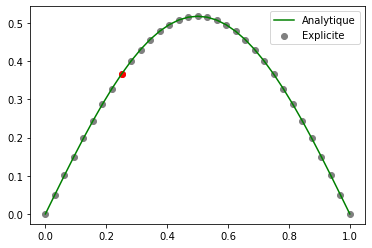

In [8]:
plt.plot(x,V(x),label='Analytique', color='green')
plt.scatter(x,U,label='Explicite', color='grey')
plt.scatter(1/4,v1, color='red')
plt.legend()

In [21]:
#Calcul de l'erreur entre la valeur approché et la valeur explicite 
#Erreur absolue
e_abs1 = abs(v1 - y)

#Erreur explicite
e_expl1 = (abs(v1 - y)*100)/y

e_abs1, e_expl1

(0.00012491608789810815, 0.03411046876539573)

**QUESTION 3.** Doubler le nombre $m$ de pas d'espace en laissant fixe le paramètre $\zeta = \Delta t/\Delta x^2$.

* Modifier le nombre de pas de temps $n$
* Calculer une solution approchée de $V$ qu'on notera $v_2$
* Calculer l'erreur $|v_2 - V|$
* Commenter le résultat

In [10]:
# Paramètres etude:

L = 1 #Longueur du domaine (longueur de la bar)
k = 1 #Coefficient de diffusion 
Tf = 1/15 #Temps final de l'étude

#Paramètres numériques:
H = 65 #Nombre de points  dans la grille la valeur n'est pas exactement égale à celle de la question 2 mais cela me permet d'avoir un valeur de x de 0.25.
n = 1028 # Nombre de pas de temps S1 = S2
x,dx = np.linspace(0,1,num = H, retstep = True)
t,dt = np.linspace (0, Tf, num = n, retstep = True)
S = k * (dt/(dx*dx)) #pour des raisons de stabilité le zéta doit avoir une valeur inférieur à 0.5

x,S

# Pour que x=0.25 il faut prendre la 16ème valeur sans prendre en compte la première valeur.


(array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
        0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
        0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    , 0.265625,
        0.28125 , 0.296875, 0.3125  , 0.328125, 0.34375 , 0.359375,
        0.375   , 0.390625, 0.40625 , 0.421875, 0.4375  , 0.453125,
        0.46875 , 0.484375, 0.5     , 0.515625, 0.53125 , 0.546875,
        0.5625  , 0.578125, 0.59375 , 0.609375, 0.625   , 0.640625,
        0.65625 , 0.671875, 0.6875  , 0.703125, 0.71875 , 0.734375,
        0.75    , 0.765625, 0.78125 , 0.796875, 0.8125  , 0.828125,
        0.84375 , 0.859375, 0.875   , 0.890625, 0.90625 , 0.921875,
        0.9375  , 0.953125, 0.96875 , 0.984375, 1.      ]),
 0.2658876987990912)

In [11]:
# Initialisation
x,dx = np.linspace(0,1,num = H, retstep = True)
t,dt = np.linspace (0, Tf, num = n, retstep = True)

U = np.sin(np.pi*x)
U,x

(array([0.00000000e+00, 4.90676743e-02, 9.80171403e-02, 1.46730474e-01,
        1.95090322e-01, 2.42980180e-01, 2.90284677e-01, 3.36889853e-01,
        3.82683432e-01, 4.27555093e-01, 4.71396737e-01, 5.14102744e-01,
        5.55570233e-01, 5.95699304e-01, 6.34393284e-01, 6.71558955e-01,
        7.07106781e-01, 7.40951125e-01, 7.73010453e-01, 8.03207531e-01,
        8.31469612e-01, 8.57728610e-01, 8.81921264e-01, 9.03989293e-01,
        9.23879533e-01, 9.41544065e-01, 9.56940336e-01, 9.70031253e-01,
        9.80785280e-01, 9.89176510e-01, 9.95184727e-01, 9.98795456e-01,
        1.00000000e+00, 9.98795456e-01, 9.95184727e-01, 9.89176510e-01,
        9.80785280e-01, 9.70031253e-01, 9.56940336e-01, 9.41544065e-01,
        9.23879533e-01, 9.03989293e-01, 8.81921264e-01, 8.57728610e-01,
        8.31469612e-01, 8.03207531e-01, 7.73010453e-01, 7.40951125e-01,
        7.07106781e-01, 6.71558955e-01, 6.34393284e-01, 5.95699304e-01,
        5.55570233e-01, 5.14102744e-01, 4.71396737e-01, 4.275550

In [12]:
UN = np.zeros (H)
#Condition limite
UN [0] = 0
UN [H-1] =0 

In [13]:
# Boucle programme 

for l in range (1,n):
    for h in range (1,H-1):
        UN[h] = U[h] + S * (U[h+1] - 2*U[h] + U[h-1])
    for h in range (0,H):
        U[h]=UN[h]
U

array([0.        , 0.02541014, 0.05075906, 0.0759857 , 0.10102928,
       0.12582947, 0.15032653, 0.17446144, 0.19817606, 0.22141325,
       0.24411704, 0.26623273, 0.28770704, 0.30848824, 0.32852626,
       0.34777284, 0.3661816 , 0.3837082 , 0.40031041, 0.41594824,
       0.43058401, 0.44418247, 0.45671085, 0.46813898, 0.47843932,
       0.48758706, 0.49556015, 0.5023394 , 0.50790847, 0.51225395,
       0.51536536, 0.5172352 , 0.51785899, 0.5172352 , 0.51536536,
       0.51225395, 0.50790847, 0.5023394 , 0.49556015, 0.48758706,
       0.47843932, 0.46813898, 0.45671085, 0.44418247, 0.43058401,
       0.41594824, 0.40031041, 0.3837082 , 0.3661816 , 0.34777284,
       0.32852626, 0.30848824, 0.28770704, 0.26623273, 0.24411704,
       0.22141325, 0.19817606, 0.17446144, 0.15032653, 0.12582947,
       0.10102928, 0.0759857 , 0.05075906, 0.02541014, 0.        ])

In [14]:
v2 = U[16]

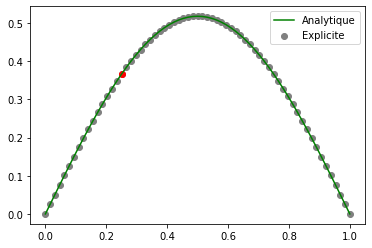

In [15]:
plt.plot(x,V(x),label='Analytique', color='green')
plt.scatter(x,U,label='Explicite', color='grey')
plt.scatter(1/4,v2, color='red')
plt.legend()

In [22]:
#Calcul de l'erreur entre la valeur approché et la valeur explicite 
#Erreur absolue
e_abs2 = abs(v2 - y)

#Erreur explicite
e_expl2 = (abs(v2 - y)*100)/y

e_abs2, e_expl2

(2.8808718521011745e-05, 0.007866712044997778)

In [24]:
e_abscomp = e_abs1 - e_abs2
e_abscomp

9.610736937709641e-05

In [26]:
e_explcomp = e_expl1 - e_expl2
e_explcomp

0.026243756720397953

L'augmentation du nombre de point de m (appelé J=33 dans la question 2 et H=65 dans la question 3) et que que le nombre de pas de temps est augmenté pour avoir un Zéta (ici S) équivalent, permet de diminuer l'erreur (absolue et relative).